In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
pic = cv2.imread('ori-news.tif', cv2.IMREAD_GRAYSCALE)
cv2.imshow('doc', pic)
cv2.waitKey(0);

In [232]:
LINES, WORDS = [], []

In [3]:
pic.shape

(868, 489)

In [4]:
ret, bin_pic = cv2.threshold(pic, 150, 1, cv2.THRESH_BINARY_INV)
y_proj = np.sum(bin_pic, axis=1)

In [11]:
cv2.imshow('inv', bin_pic)
cv2.waitKey(0)

113

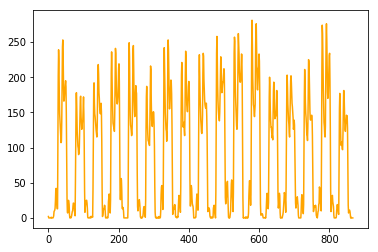

In [6]:
plt.plot(y_proj, color='orange')
plt.show()

In [7]:
## finding the empty gaps
def gap_groups(y):
    y = np.array(y)
    starts,gaps = [],[]
    zero = list(np.where(y < 2)[0])
    k = 0
    st = zero[0]
    en = zero[0]
    while (st < len(y) and k < len(zero)-1):
        while(y[en] < 2 and en < len(y)-1): 
            en+=1
        starts.append(st)
        gaps.append(en+1-st)
        while(k < len(zero) and zero[k]< en):
            k+=1
        if k >= len(zero) - 1: break
        st = zero[k]
        en = zero[k]
    return np.array(starts), np.array(gaps)   

In [26]:
lstarts, lgaps = gap_groups(y_proj)
lstarts[0] += lgaps[0]-1
lstarts, lgaps = lstarts[lgaps >= 5], lgaps[lgaps>=5]

In [27]:
print(lstarts)

[ 15  61 112 163 215 263 305 316 363 414 461 513 555 612 661 713 814 861]


In [28]:
lgaps

array([15,  6,  9,  8, 13,  7, 11,  5,  6,  8, 10,  6, 16,  9,  7,  8,  8,
        7])

In [33]:
LINES = []
lims=[]
for i in range(1,len(lstarts)):
    seg = pic[lstarts[i-1]:lstarts[i], :]
    lims.append([lstarts[i-1], lstarts[i]])
    LINES.append(seg)
    cv2.imshow('segment_{}'.format(i), seg)
    if cv2.waitKey(0) & 0xff == ord('q'): break
    cv2.destroyAllWindows()
cv2.destroyAllWindows()
    

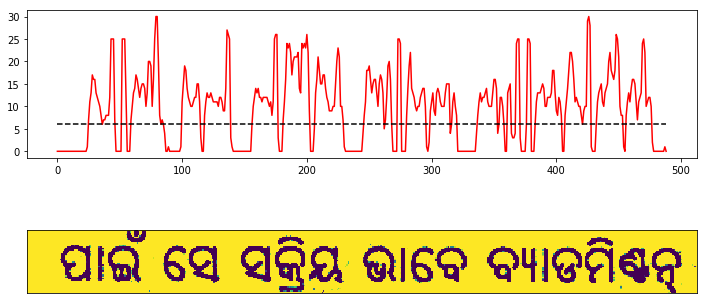

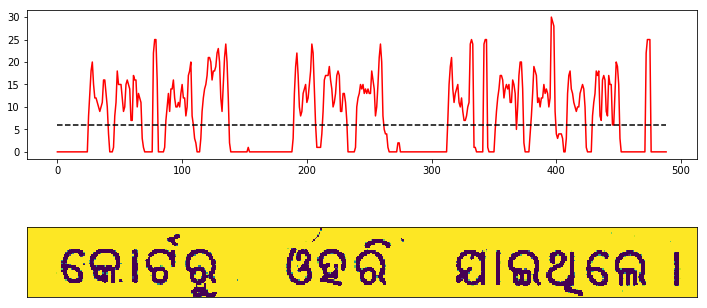

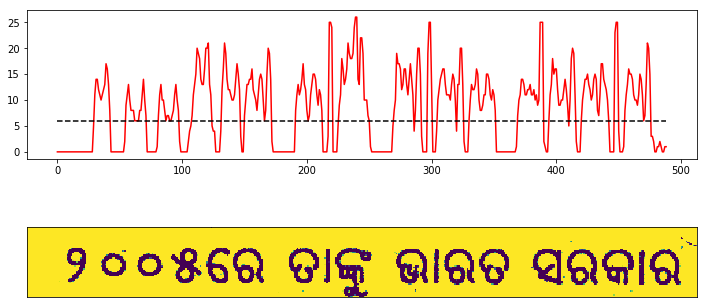

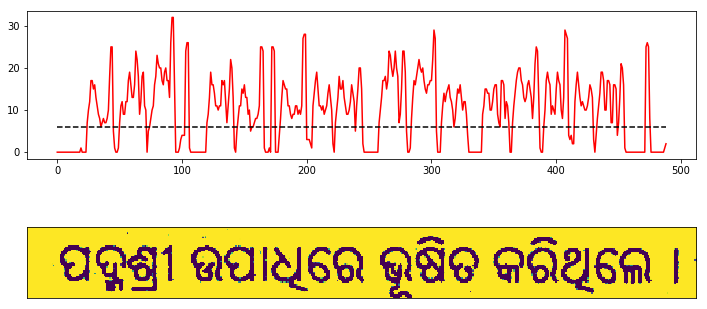

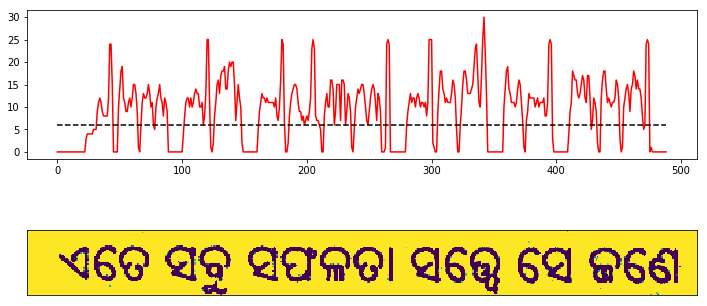

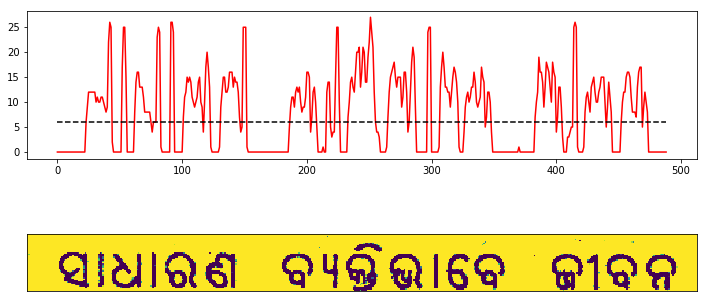

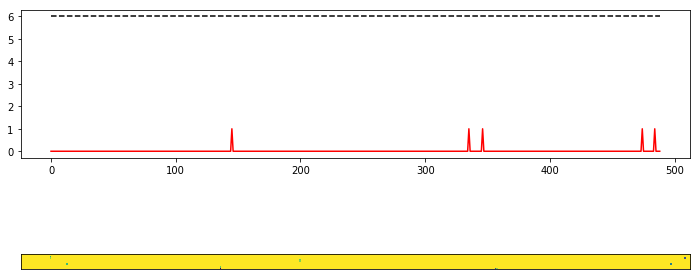

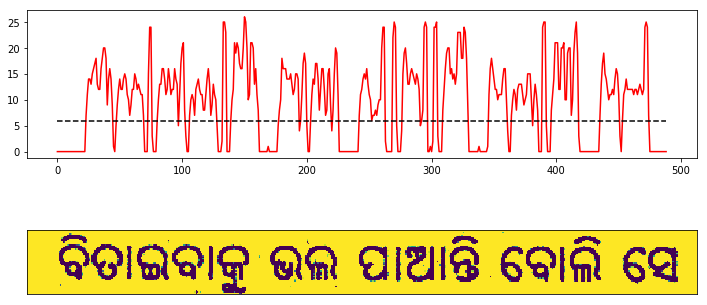

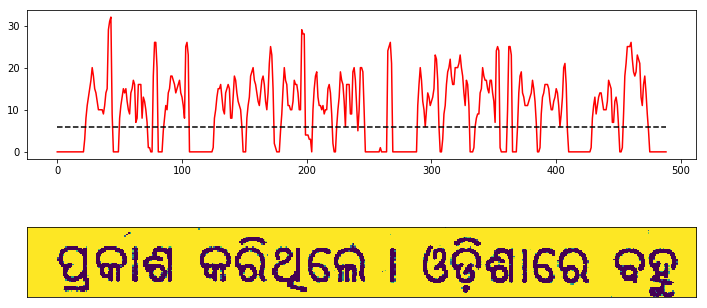

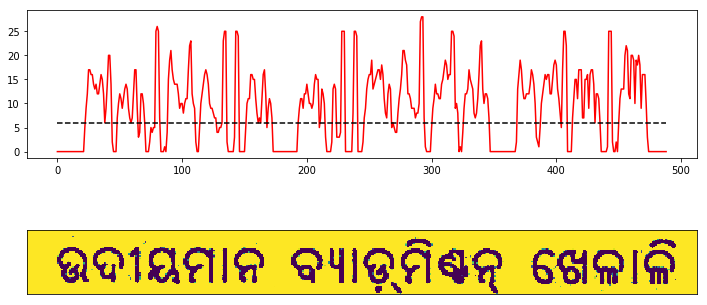

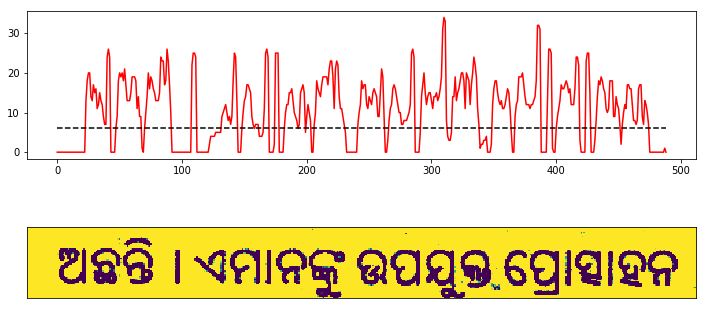

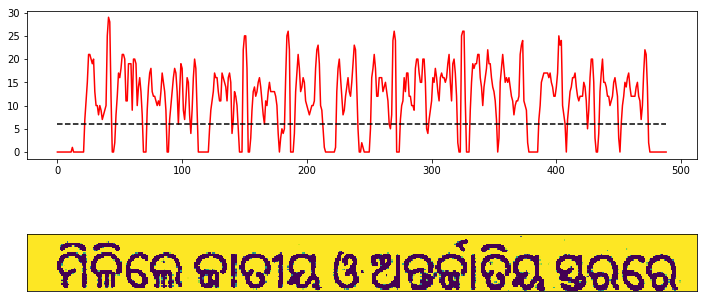

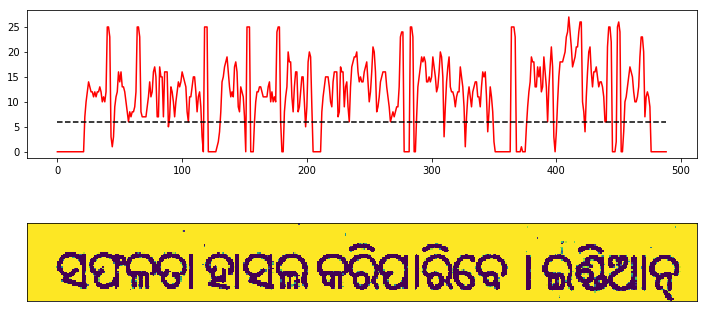

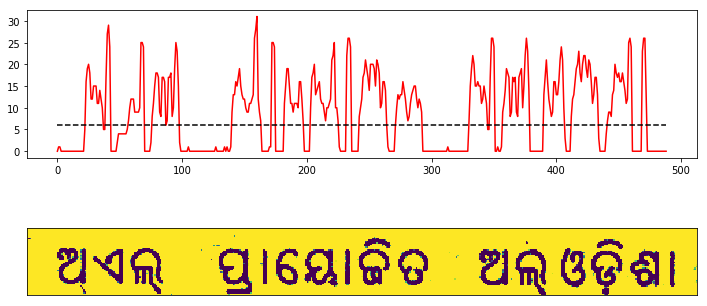

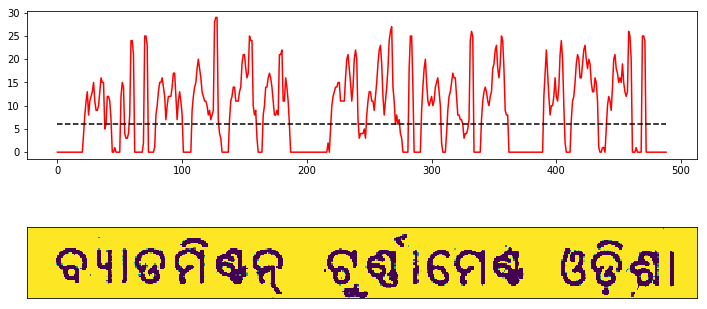

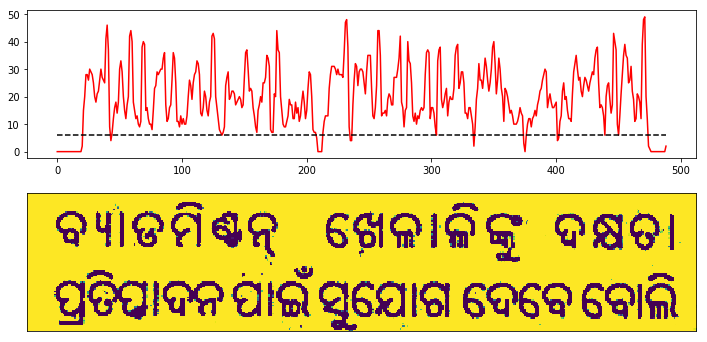

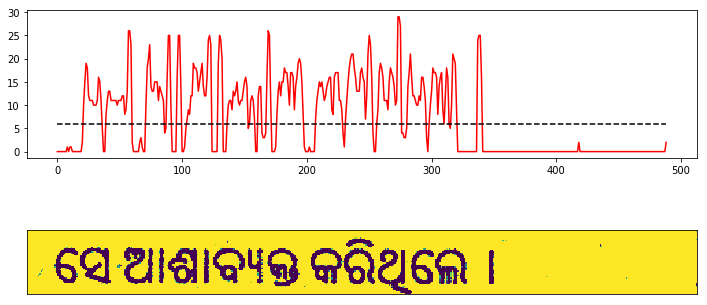

In [34]:
WORDS = []
for num,row in enumerate(LINES):
    beg, end = lims[num][0], lims[num][1]
    row_bin = bin_pic[beg:end, :]
    x_proj = np.sum(row_bin, axis=0)
    wstarts, wgaps = gap_groups(x_proj)
    blip = 6
    wgaps, wstarts = wgaps[wgaps > blip], wstarts[wgaps > blip]
    # wstarts,wgaps
    plt.figure(figsize=(12,6))
    plt.subplot(211)
    plt.plot(x_proj, color='red')
    plt.plot(range(len(x_proj)), [blip]*len(x_proj), '--', 
             color='black')
    plt.subplot(212)
    plt.imshow(row)
    plt.xticks([]);plt.yticks([]);
    plt.show()
#     WORDS = []
    for i in range(1,len(wstarts)):
        seg = pic[beg:end, wstarts[i-1]+wgaps[i-1]-1: wstarts[i]]
        WORDS.append(seg)
        cv2.imshow('segment_{}'.format(i), seg)
        if cv2.waitKey(0) & 0xff == ord('q'): break
        cv2.destroyAllWindows()
    cv2.destroyAllWindows()


In [35]:
len(WORDS), len(LINES)

(106, 17)